# Information content example: compute knees

In [1]:
%load_ext autoreload
%autoreload
import fcpy

/workspace/field-compression/miniconda3/envs/fcpy/lib/python3.10/site-packages/ecmwflibs/__init__.py:69: UserWarning: ecmwflibs: ignoring provided 'GRIB_DEFINITION_PATH' set to '/workspace/field-compression/miniconda3/envs/fcpy/lib/metview-bundle/share/metview/etc/grib_def/definitions:/workspace/field-compression/miniconda3/envs/fcpy/./share/eccodes/definitions:/tmp/mv.9043./bufr_def'. If you want ecmwflibs to use this environment variable, use ECMWFLIBS_GRIB_DEFINITION_PATH instead. If you want to use your own ECCODES library, use ECMWFLIBS_ECCODES.
  warnings.warn(


In [2]:
ds = fcpy.open_dataset("../data/cams_q_20191201_v3.nc")

# q: specific humidity
# lev = hybrid
ds = ds[["q"]].isel(lev=range(0, 10))
ds

<xarray.Dataset>
Dimensions:  (time: 1, lev: 10, lat: 451, lon: 900)
Coordinates:
  * time     (time) datetime64[ns] 2019-12-01T12:00:00
  * lon      (lon) float64 0.0 0.4 0.8 1.2 1.6 ... 358.0 358.4 358.8 359.2 359.6
  * lat      (lat) float64 -90.0 -89.6 -89.2 -88.8 -88.4 ... 88.8 89.2 89.6 90.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    q        (time, lev, lat, lon) float32 dask.array<chunksize=(1, 10, 451, 900), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Feb 15 18:37:28 2021: cdo -f nc4 copy tmp.grib data/mil...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

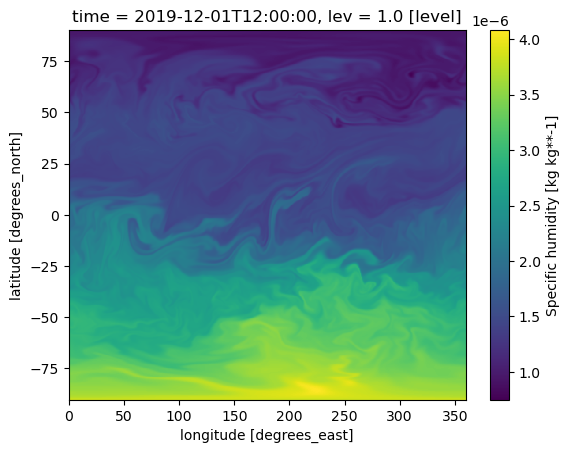

In [8]:
da_reference = ds["q"].isel(lev=0)
da_reference.plot()

Compressor: Round


 76%|████████████████████████████████▌          | 22/29 [01:04<00:02,  2.68it/s]/workspace/field-compression/miniconda3/envs/fcpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
 79%|██████████████████████████████████         | 23/29 [01:05<00:02,  2.73it/s]/workspace/field-compression/miniconda3/envs/fcpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
 83%|███████████████████████████████████▌       | 24/29 [01:05<00:01,  2.77it/s]/workspace/field-compression/miniconda3/envs/fcpy/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
 86%|█████████████████████████████████████      | 25/29 [01:06<00:01,  2.68it/s]/workspace/field-compression/miniconda3/envs/fcpy/lib/python3.10/

Compressor: LinQuantization


100%|███████████████████████████████████████████| 29/29 [00:07<00:00,  3.66it/s]


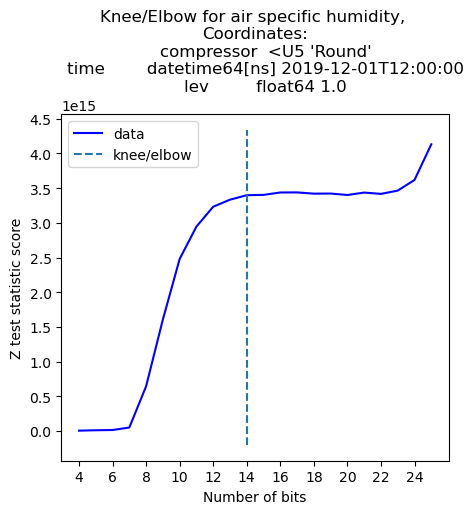

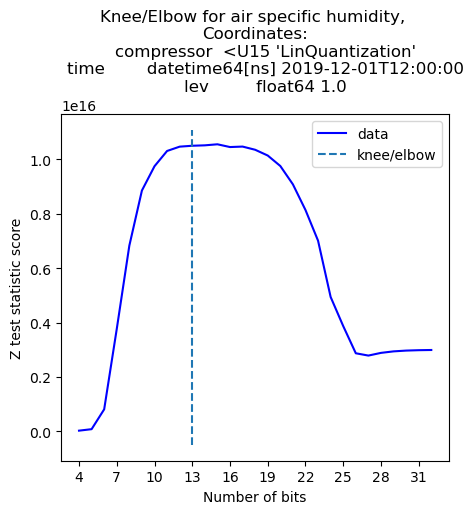

In [4]:
# bits_params are the parameters of the dataset
bits_params = fcpy.get_bits_params(da_reference)
bits_min = fcpy.compute_min_bits(da_reference, bits_params)
# Compare purely random data to the difference between baseline and decompressed data,
#  then the sigmas determine the likeness between the random data and the differences
# looks random -> no patterns in the difference -> sigma=1
# has clear patterns -> bad -> sigma=0
da_sigmas = fcpy.compute_sigmas(
    da_reference, compressors=[fcpy.Round(), fcpy.LinQuantization()]
)
# minimum is 4 in this case, range of data requires at least four bits (with IEEE floats)
# maximum bits is how many mantissa bits the input data has
fcpy.compute_knees_field(da_reference, da_sigmas, plot=True);